In [1]:
#using PlotlyJS
using Plots
using DelimitedFiles
using Statistics
using LaTeXStrings
using DataFrames
using GLM
#plotlyjs()
gr()
data_dir = "/Users/joren/gdrive/RU/projects/2d-ricci/data";

In [2]:
sets = [["ric2dcdt", "ricci", [50, 90, 150, 350, 600]],
    ["dric2dcdt", "ricci_dual", [100, 200, 250]],
    ["hric", "riccih", [500]],
    ["vric", "ricciv", [500]]];

In [3]:
ricciFlat = [1.666667, 1.604167, 1.592593, 1.588542, 1.586667, 1.585648, 1.585034, 1.584635, 1.584362, 1.584167, 1.584022, 1.583912, 1.583826, 1.583759, 1.583704, 1.583659, 1.583622, 1.583591, 1.583564, 1.583542, 1.583522, 1.583506, 1.583491, 1.583478, 1.583467, 1.583457, 1.583448, 1.583440, 1.583432, 1.583426];
ricciDualFlat = [1.888889, 1.666667, 1.620027, 1.604167, 1.596622, 1.592593, 1.590124, 1.588542, 1.587444, 1.586667, 1.586086, 1.585648, 1.585305, 1.585034, 1.584814, 1.584635, 1.584486, 1.584362, 1.584256, 1.584167, 1.584089, 1.584022, 1.583963, 1.583912, 1.583867, 1.583826, 1.583791, 1.583759, 1.583730, 1.583704, 1.583680, 1.583659, 1.583639, 1.583622, 1.583605, 1.583591, 1.583577, 1.583564, 1.583552, 1.583542];

In [4]:
ricciFlatLong = [ 1.666667,  1.604167,  1.592593,  1.588542,  1.586667,  1.585648,
        1.585034,  1.584635,  1.584362,  1.584167,  1.584022,  1.583912,
        1.583826,  1.583759,  1.583704,  1.583659,  1.583622,  1.583591,
        1.583564,  1.583542,  1.583522,  1.583506,  1.583491,  1.583478,
        1.583467,  1.583457,  1.583448,  1.58344 ,  1.583432,  1.583426,
        1.58342 ,  1.583415,  1.58341 ,  1.583405,  1.583401,  1.583398,
        1.583394,  1.583391,  1.583388,  1.583385]
ricciDualFlatLong = [ 1.888889,  1.666667,  1.620027,  1.604167,  1.596622,  1.592593,
        1.590124,  1.588542,  1.587444,  1.586667,  1.586086,  1.585648,
        1.585305,  1.585034,  1.584814,  1.584635,  1.584486,  1.584362,
        1.584256,  1.584167,  1.584089,  1.584022,  1.583963,  1.583912,
        1.583867,  1.583826,  1.583791,  1.583759,  1.58373 ,  1.583704,
        1.58368 ,  1.583659,  1.583639,  1.583622,  1.583605,  1.583591,
        1.583577,  1.583564,  1.583552,  1.583542,  1.583532,  1.583522,
        1.583514,  1.583506,  1.583498,  1.583491,  1.583484,  1.583478,
        1.583472,  1.583467,  1.583461,  1.583457,  1.583452,  1.583448,
        1.583444,  1.58344 ,  1.583436,  1.583432,  1.583429,  1.583426];

In [5]:
appelcolshex = ["164891","D92546","21A650","65B7EF","FF821C","CF2AA0","F23322","22D369","F0F800","F85029"]
appelcols = map(x -> parse(Colorant, "#"*x), appelcolshex)

garliccolshex = ["2e3192", "ed2024", "3cb54a", "f8b4c0", "90d5e3", "FF821C", "72BF44"]
garliccols = map(x -> parse(Colorant, "#"*x), garliccolshex)

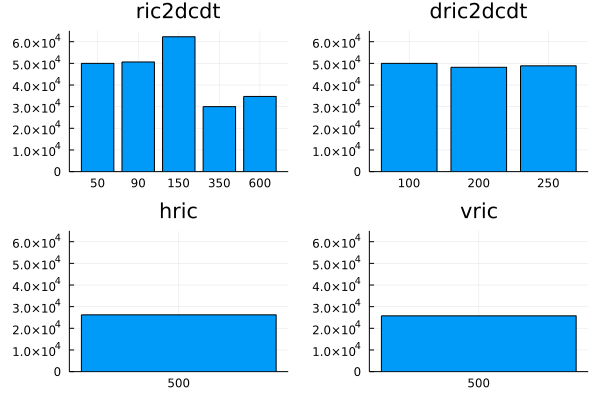

In [6]:
vols = Dict()
vps = Dict()
vmean = Dict()
vse = Dict()
vlens = Dict()
for s in sets
    vols[s[1]] = s[3]
    vps[s[1]] = Dict()
    vmean[s[1]] = Dict()
    vse[s[1]] = Dict()
    vlens[s[1]] = Dict{Int64,Int64}()
    for v in s[3]
        #println("data/agg-$(s[1])-$(s[2])-$(v)000.dat")
        r = readdlm("$(data_dir)/agg-$(s[1])-$(s[2])-$(v)000.dat")
        vps[s[1]][v] = r
        vmean[s[1]][v] = vec(mean(r, dims=1))
        vse[s[1]][v] = vec(std(r, dims=1)/sqrt(size(r,1)))
        vlens[s[1]][v] = size(r, 1)
    end
end
ps = []
for s in sets
    sort_keys = sort(collect(keys(vlens[s[1]])))
    push!(ps, 
        bar(
            map(string, sort_keys),
            map(x -> vlens[s[1]][x], sort_keys),
            legend=false,
            title=s[1],
            ylims=(0,65000)
        )
    )
end
plot(ps..., layout=length(ps))

In [7]:
using Plots.PlotMeasures

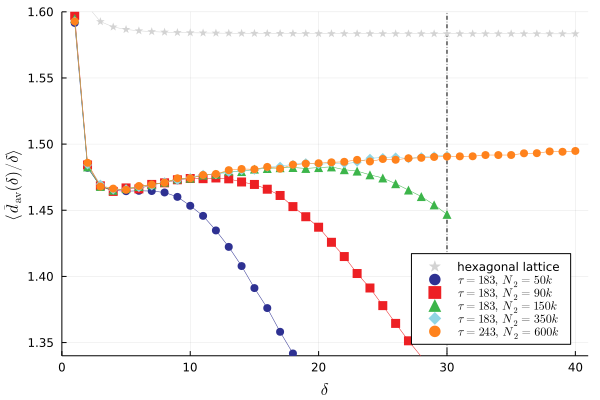

In [11]:
plot()
# cmap = Dict(50 => 3, 90 => 8, 150 => 12, 350 => 23, 500 => 15, 600 => 24)
# cols = Dict([a => colorschemes[:klimt][b] for (a,b) in cmap])
cmap = Dict(50 => 1, 90 => 2, 150 => 3, 350 => 5, 500 => 6, 600 => 6)
cols = Dict([a => garliccols[b] for (a,b) in cmap])
shapes = Dict(50 => :circle, 90 => :rect, 150 => :utriangle, 350 => :diamond, 500 => :dtriangle, 600 => :circle)
sid = "ric2dcdt"
vline!([30], label=false, color=:black, linestyle=:dashdot)
#scatter!(1:size(ricciFlat, 1), ricciFlat, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)
plot!(1:size(ricciFlatLong, 1), ricciFlatLong, ms=6, markerstrokecolor=:lightgray, lw=0.5, label=false, color=:lightgray)
scatter!(1:size(ricciFlatLong, 1), ricciFlatLong, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)

for v in [50, 90, 150, 350]
    scatter!(1:size(vmean[sid][v], 1), vmean[sid][v], 
        label=L"\tau=183,\, N_2=%$v k", ms=4.5, markerstrokecolor=cols[v], color=cols[v],markershape=shapes[v]
    )
    plot!(1:size(vmean[sid][v], 1), vmean[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.5, label=false, color=cols[v])
end
vv = 600
scatter!(1:size(vmean[sid][vv], 1), vmean[sid][vv], 
        label=L"\tau=243,\, N_2=%$vv k", ms=4.5, markerstrokecolor=cols[vv], color=cols[vv],markershape=shapes[vv]
    )
plot!(1:size(vmean[sid][vv], 1), vmean[sid][vv], ms=6, markerstrokecolor=cols[vv], lw=0.5, label=false, color=cols[vv])

# for v in vols[sid]
#     plot!(1:size(vmean[sid][v], 1), vmean[sid][v], yerr=vse[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.3, label=false, color=cols[v])
# end

plot!(xlims = (0, 41), ylims = (1.34, 1.6), legend=:bottomright)
ylabel!(L"\langle\bar{d}_\textrm{av}(\delta)/\delta\rangle")
display(xlabel!(L"\delta"))
savefig("ric2dcdt.pdf")
# savefig("../article/figures/ric2dcdt.pdf")
# savefig("../v2/figures/ric2dcdt.pdf")

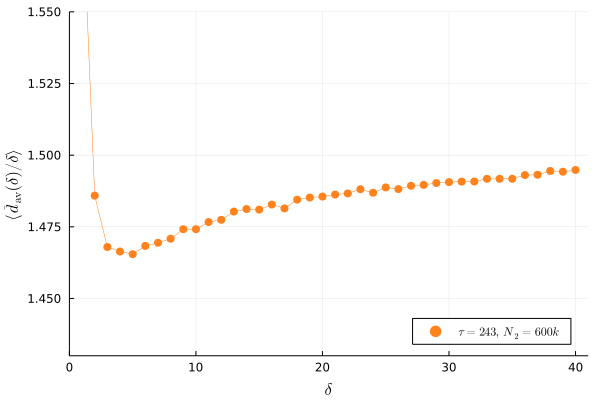

In [10]:
plot()
# cmap = Dict(50 => 3, 90 => 8, 150 => 12, 350 => 23, 500 => 15, 600 => 24)
# cols = Dict([a => colorschemes[:klimt][b] for (a,b) in cmap])
cmap = Dict(50 => 1, 90 => 2, 150 => 3, 350 => 5, 500 => 6, 600 => 6)
cols = Dict([a => garliccols[b] for (a,b) in cmap])
shapes = Dict(50 => :circle, 90 => :rect, 150 => :utriangle, 350 => :diamond, 500 => :dtriangle, 600 => :circle)
sid = "ric2dcdt"
# vline!([30], label=false, color=:black, linestyle=:dashdot)
#scatter!(1:size(ricciFlat, 1), ricciFlat, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)
# plot!(1:size(ricciFlatLong, 1), ricciFlatLong, ms=6, markerstrokecolor=:lightgray, lw=0.5, label=false, color=:lightgray)
# scatter!(1:size(ricciFlatLong, 1), ricciFlatLong, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)

# for v in [350]
#     scatter!(1:size(vmean[sid][v], 1), vmean[sid][v], 
#         label=L"\tau=183,\, N_2=%$v k", ms=4.5, markerstrokecolor=cols[v], color=cols[v],markershape=shapes[v]
#     )
#     plot!(1:size(vmean[sid][v], 1), vmean[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.5, label=false, color=cols[v])
# end
vv = 600
scatter!(1:size(vmean[sid][vv], 1), vmean[sid][vv], 
        label=L"\tau=243,\, N_2=%$vv k", ms=4.5, markerstrokecolor=cols[vv], color=cols[vv],markershape=shapes[vv]
    )
plot!(1:size(vmean[sid][vv], 1), vmean[sid][vv], ms=6, markerstrokecolor=cols[vv], lw=0.5, label=false, color=cols[vv])

# for v in vols[sid]
#     plot!(1:size(vmean[sid][v], 1), vmean[sid][v], yerr=vse[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.3, label=false, color=cols[v])
# end

plot!(xlims = (0, 41), ylims = (1.43, 1.55), legend=:bottomright)
ylabel!(L"\langle\bar{d}_\textrm{av}(\delta)/\delta\rangle")
display(xlabel!(L"\delta"))
savefig("~/tmp/ric2dcdt-bare.png")

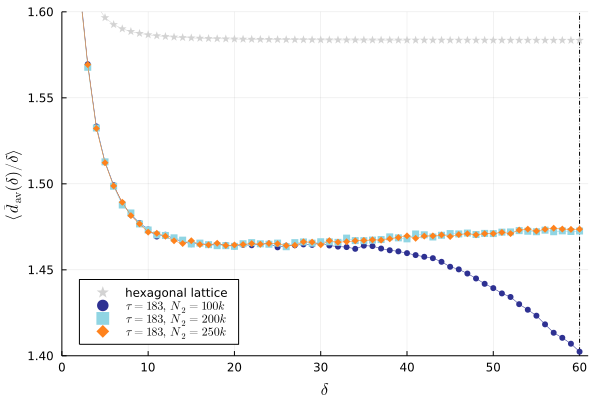

In [17]:
plot()
# dcmap = Dict(100 => 3, 200 => 15, 250 => 23)
# dcols = Dict([a => colorschemes[:klimt][b] for (a,b) in dcmap])
# dcmap = Dict(100 => 1, 200 => 4, 250 => 5)
# dcols = Dict([a => appelcols[b] for (a,b) in dcmap])
dcmap = Dict(100 => 1, 200 => 5, 250 => 6)
dcols = Dict([a => garliccols[b] for (a,b) in dcmap])
dshapes = Dict(100 => :circle, 200 => :rect, 250 => :diamond)
sid = "dric2dcdt"

vline!([60], label=false, color=:black, linestyle=:dashdot)

# scatter!(1:size(ricciDualFlat, 1), ricciDualFlat, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)
plot!(1:size(ricciDualFlat, 1), ricciDualFlat, ms=6, markerstrokecolor=:lightgray, lw=0.5, label=false, color=:lightgray)
scatter!(1:size(ricciDualFlatLong, 1), ricciDualFlatLong, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)

for v in vols[sid]
    scatter!(1:size(vmean[sid][v], 1), 
        vmean[sid][v], 
        label=L"\tau=183,\,N_2=%$v k", 
        ms=3.5, 
        markerstrokecolor=dcols[v], 
        color=dcols[v],
        markershape=dshapes[v]
    )
    plot!(1:size(vmean[sid][v], 1), 
        vmean[sid][v], 
#         yerr=vse[sid][v], 
        ms=6, markerstrokecolor=dcols[v], 
        lw=0.5, label=false, color=dcols[v]
    )
end

plot!(xlims = (0, 61), ylims = (1.4, 1.6), legend=:bottomleft)
ylabel!(L"\langle\bar{d}_\textrm{av}(\delta)/\delta\rangle")
display(xlabel!(L"\delta"))
savefig("dric2dcdt.pdf")
# savefig("../article/figures/dric2dcdt.pdf")
# savefig("../v2/figures/dric2dcdt.pdf")

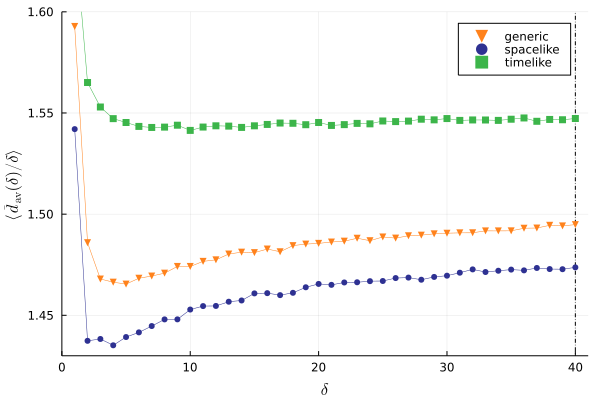

In [32]:
plot()
# col_mix = appelcols[5]
# col_hor = appelcols[1]
# col_ver = appelcols[8]


col_mix = garliccols[6]
col_hor = garliccols[1]
col_ver = garliccols[3]

vline!([40], label=false, color=:black, linestyle=:dashdot)
# scatter!(1:size(ricciFlat, 1), ricciFlat, label="hexagonal lattice", ms=4.5, markershape=:star, color=:lightgray, markerstrokecolor=:lightgray)
# plot!(1:size(ricciFlat, 1), ricciFlat, ms=6, markerstrokecolor=:lightgray, lw=0.5, label=false, color=:lightgray)

scatter!(1:size(vmean["ric2dcdt"][600], 1), 
    vmean["ric2dcdt"][600],
    label="generic",
    ms=3.5,
    markerstrokecolor=col_mix,
    color=col_mix,
    markershape=shapes[500]
)
plot!(1:size(vmean["ric2dcdt"][600], 1), 
    vmean["ric2dcdt"][600], 
#     yerr=vse["ric2dcdt"][500], 
    ms=6, markerstrokecolor=col_mix, 
    lw=0.5, label=false, color=col_mix
)

scatter!(1:size(vmean["hric"][500], 1), 
    vmean["hric"][500],
    label="spacelike",
    ms=3.5,
    markerstrokecolor=col_hor,
    color=col_hor,
    markershape=shapes[50]
)
plot!(1:size(vmean["hric"][500], 1), 
    vmean["hric"][500], 
#     yerr=vse["hric"][500], 
    ms=6, markerstrokecolor=col_hor, 
    lw=0.5, label=false, color=col_hor
)

scatter!(1:size(vmean["vric"][500], 1), 
    vmean["vric"][500],
    label="timelike",
    ms=3.5,
    markerstrokecolor=col_ver,
    color=col_ver,
    markershape=shapes[90]
)
plot!(1:size(vmean["vric"][500], 1), 
    vmean["vric"][500], 
#     yerr=vse["vric"][500], 
    ms=6, markerstrokecolor=col_ver, 
    lw=0.5, label=false, color=col_ver
)

plot!(xlims = (0, 41), ylims = (1.43, 1.6))
ylabel!(L"\langle\bar{d}_\textrm{av}(\delta)/\delta\rangle")
display(xlabel!(L"\delta"))
savefig("ric-anisotropic.pdf")

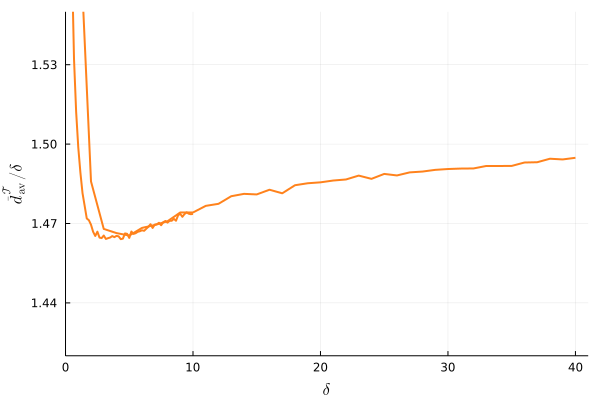

In [21]:
plot()
plot!(1:size(vmean["ric2dcdt"][600], 1), vmean["ric2dcdt"][600], ms=6, markerstrokecolor=cols[600], 
    lw=2, label=false, color=cols[600])
plot!((1:size(vmean["dric2dcdt"][250], 1))/6, 
        vmean["dric2dcdt"][250], 
        ms=6, markerstrokecolor=dcols[250], 
        lw=2, label=false, color=dcols[250])
plot!(xlims = (0, 41), ylims = (1.42, 1.55))
ylabel!(L"\bar{d}_\textrm{av}^\mathcal{T}/\delta")
display(xlabel!(L"\delta"))

savefig("ric-primal-dual-rescale.pdf")

In [39]:
map(x -> 1.01*x, vmean["dric2dcdt"][250])

60-element Vector{Float64}:
 1.786575325094579
 1.6315765312416068
 1.5849725485338193
 1.547494135367876
 1.5273520277747301
 1.513757018506387
 1.5041796622643715
 1.49630900678472
 1.4914965959484523
 1.486619771456559
 1.4859527044390763
 1.484225807212373
 1.481530382035498
 ⋮
 1.4857089420307892
 1.4857439405736161
 1.4864680369656897
 1.4857466240787751
 1.48785782446528
 1.4883829157902062
 1.4872540445506472
 1.4883027409613496
 1.4889360498122748
 1.4884310007678923
 1.488244311671512
 1.4883794447009087

# Level 1 violations

In [18]:
plvl1t183 = readdlm("$(data_dir)/violations-primal-lvl-1-T183.dat")
plvl1t123 = readdlm("$(data_dir)/violations-primal-lvl-1-T123.dat")
plvl1t243 = readdlm("$(data_dir)/violations-primal-lvl-1-T243.dat")
pdlvl1t183 = readdlm("$(data_dir)/violations-dual-lvl-1-T183.dat")

dplvl1t183 = Dict([convert(Int64, x[1]) => x[2:size(plvl1t183, 2)] for x in eachrow(plvl1t183)])
dplvl1t123 = Dict([convert(Int64, x[1]) => x[2:size(plvl1t123, 2)] for x in eachrow(plvl1t123)])
dplvl1t243 = Dict([convert(Int64, x[1]) => x[2:size(plvl1t243, 2)] for x in eachrow(plvl1t243)])
dpdlvl1t183 = Dict([convert(Int64, x[1]) => x[2:size(pdlvl1t183, 2)] for x in eachrow(pdlvl1t183)])

Dict{Int64, Vector{Float64}} with 4 entries:
  60  => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.002, 0.003  …  0.508, 0.5…
  90  => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.145, 0.181, 0.…
  30  => [0.0, 0.0, 0.001, 0.002, 0.005, 0.011, 0.019, 0.033, 0.052, 0.069  …  …
  150 => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.003, 0.006, 0.…

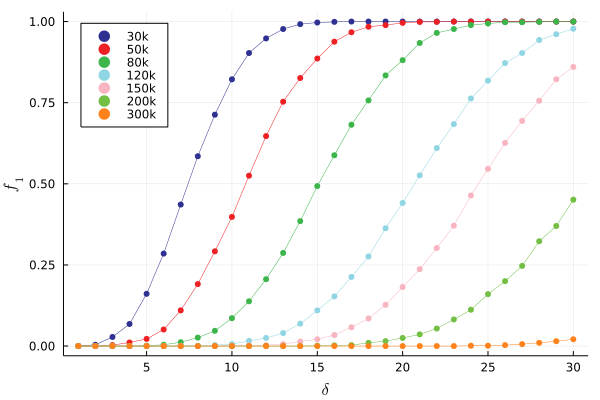

In [24]:
plot()
# lvl1cmap = Dict(30 => 1, 50 => 3, 80 => 8, 120 => 9, 150 => 12, 200 => 15, 300 => 23)
# lvl1cols = Dict([a => colorschemes[:klimt][b] for (a,b) in lvl1cmap])
# lvl1cmap = Dict(30 => 1, 50 => 2, 80 => 3, 120 => 4, 150 => 5, 200 => 6, 300 => 7)
# lvl1cols = Dict([a => appelcols[b] for (a,b) in lvl1cmap])

lvl1cmap = Dict(30 => 1, 50 => 2, 80 => 3, 120 => 5, 150 => 4, 200 => 7, 300 => 6)
lvl1cols = Dict([a => garliccols[b] for (a,b) in lvl1cmap])

for v in sort(collect(keys(dplvl1t183)))
    scatter!(1:size(dplvl1t183[v], 1), 
        dplvl1t183[v], 
        label=string(v)*"k", 
        ms=3.5, 
        markerstrokecolor=lvl1cols[v], 
        color=lvl1cols[v],
        legend=:topleft
    )
    plot!(1:size(dplvl1t183[v], 1), dplvl1t183[v], ms=6, markerstrokecolor=lvl1cols[v], lw=0.5, label=false, color=lvl1cols[v])
end
ylabel!(L"f_1")
display(xlabel!(L"\delta"))

savefig("violations-primal-lvl-1.pdf")

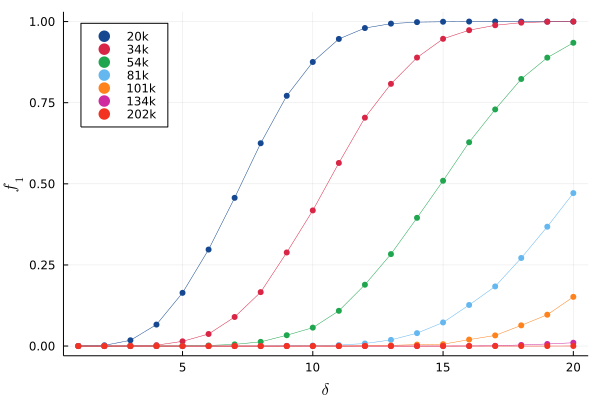

In [24]:
plot()
# lvl1t123cmap = Dict(20 => 1, 34 => 3, 54 => 8, 81 => 9, 101 => 12, 134 => 15, 202 => 23)
# lvl1t123cols = Dict([a => colorschemes[:klimt][b] for (a,b) in lvl1t123cmap])
lvl1t123cmap = Dict(20 => 1, 34 => 2, 54 => 3, 81 => 4, 101 => 5, 134 => 6, 202 => 7)
lvl1t123cols = Dict([a => appelcols[b] for (a,b) in lvl1t123cmap])
for v in sort(collect(keys(dplvl1t123)))
    scatter!(1:size(dplvl1t123[v], 1), 
        dplvl1t123[v], 
        label=string(v)*"k", 
        ms=3.5, 
        markerstrokecolor=lvl1t123cols[v], 
        color=lvl1t123cols[v],
        legend=:topleft
    )
    plot!(1:size(dplvl1t123[v], 1), dplvl1t123[v], ms=6, markerstrokecolor=lvl1t123cols[v], lw=0.5, label=false, color=lvl1t123cols[v])
end
ylabel!(L"f_1")
display(xlabel!(L"\delta"))

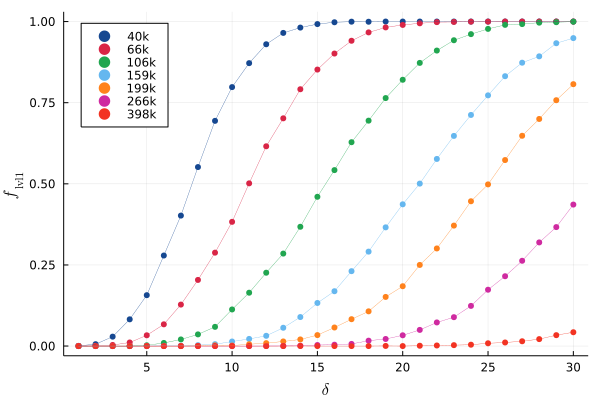

In [25]:
plot()
lvl1t243cmap = Dict(40 => 1, 66 => 2, 106 => 3, 159 => 4, 199 => 5, 266 => 6, 398 => 7)
lvl1t243cols = Dict([a => appelcols[b] for (a,b) in lvl1t243cmap])
for v in sort(collect(keys(dplvl1t243)))
    scatter!(1:size(dplvl1t243[v], 1), 
        dplvl1t243[v], 
        label=string(v)*"k", 
        ms=3.5, 
        markerstrokecolor=lvl1t243cols[v], 
        color=lvl1t243cols[v],
        legend=:topleft
    )
end
for v in sort(collect(keys(dplvl1t243)))
    plot!(1:size(dplvl1t243[v], 1), dplvl1t243[v], ms=6, 
        markerstrokecolor=lvl1t243cols[v], lw=0.3, label=false, 
        color=lvl1t243cols[v])
end
ylabel!(L"f_\textrm{lvl1}")
display(xlabel!(L"\delta"))

# Level 2 violations

In [21]:
plvl2 = readdlm("$(data_dir)/violations-primal-lvl-2-T183.dat")
pdlvl2 = readdlm("$(data_dir)/violations-dual-lvl-2-T183.dat")

dplvl2 = Dict([convert(Int64, x[1]) => x[2:size(plvl2, 2)] for x in eachrow(plvl2)])
dpdlvl2 = Dict([convert(Int64, x[1]) => x[2:size(pdlvl2, 2)] for x in eachrow(pdlvl2)])

Dict{Int64, Vector{Float64}} with 4 entries:
  60  => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001  …  0.051, 0.068, …
  90  => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.004, 0.004, 0.…
  30  => [0.0, 0.0, 0.0, 0.001, 0.002, 0.002, 0.004, 0.006, 0.009, 0.014  …  0.…
  150 => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0…

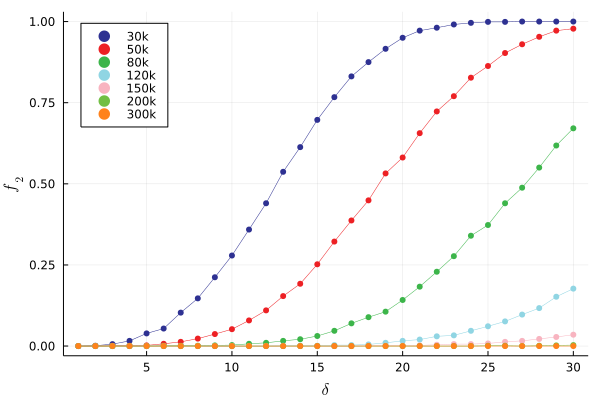

In [23]:
plot()
# lvl2cmap = Dict(30 => 1, 50 => 3, 80 => 8, 120 => 9, 150 => 12, 200 => 15, 300 => 23)
# lvl2cols = Dict([a => colorschemes[:klimt][b] for (a,b) in lvl2cmap])
# lvl2cmap = Dict(30 => 1, 50 => 2, 80 => 3, 120 => 4, 150 => 5, 200 => 6, 300 => 7)
# lvl2cols = Dict([a => appelcols[b] for (a,b) in lvl1cmap])

lvl2cmap = Dict(30 => 1, 50 => 2, 80 => 3, 120 => 5, 150 => 4, 200 => 7, 300 => 6)
lvl2cols = Dict([a => garliccols[b] for (a,b) in lvl2cmap])

for v in sort(collect(keys(dplvl2)))
    scatter!(1:size(dplvl2[v], 1), 
        dplvl2[v], 
        label=string(v)*"k", 
        ms=3.5, 
        markerstrokecolor=lvl2cols[v], 
        color=lvl2cols[v],
        legend=:topleft
    )
    plot!(1:size(dplvl2[v], 1), dplvl2[v], ms=6, markerstrokecolor=lvl2cols[v], lw=0.5, label=false, color=lvl2cols[v])
end
ylabel!(L"f_2")
display(xlabel!(L"\delta"))

savefig("violations-primal-lvl-2-test.pdf")

# Violation prediction

In [25]:
threshold = 0.01
pvolst183 = sort(collect(keys(dplvl1t183)))
pdelmaxt183 = [findfirst(x -> x > threshold, dplvl1t183[key]) for key in pvolst183]
pdelmaxt123 = [y for y in [findfirst(x -> x > threshold, dplvl1t123[key]) 
            for key in sort(collect(keys(dplvl1t123)))] 
        if y != nothing]
pvolst123 = sort(collect(keys(dplvl1t123)))[1:size(pdelmaxt123,1)]
pvolst243 = sort(collect(keys(dplvl1t243)))
pdelmaxt243 = [findfirst(x -> x > threshold, dplvl1t243[key]) for key in pvolst243]

dvols = sort(collect(keys(dpdlvl1t183)))
ddelmax = [findfirst(x -> x > threshold, dpdlvl1t183[key]) for key in dvols]

4-element Vector{Int64}:
  6
 13
 21
 35

In [27]:
ft123 = DataFrame(X=pvolst123, Y=pdelmaxt123)
ft183 = DataFrame(X=pvolst183, Y=pdelmaxt183)
ft243 = DataFrame(X=pvolst243, Y=pdelmaxt243)
fdt183 = DataFrame(X=dvols, Y=ddelmax)

ols123 = lm(@formula(Y ~ X), ft123)
ols183 = lm(@formula(Y ~ X), ft183)
ols243 = lm(@formula(Y ~ X), ft243)
olsd183 = lm(@formula(Y ~ X), fdt183)

# lmfit123 = predict(ols123, DataFrame(X=vcat(pvolst123, [(20-coef(ols123)[1])/coef(ols123)[2]])))
# lmfit183 = predict(ols183, DataFrame(X=vcat(pvolst183, [(30-coef(ols183)[1])/coef(ols183)[2]])))
# lmfit243 = predict(ols243, DataFrame(X=vcat(pvolst243, [(40-coef(ols243)[1])/coef(ols243)[2]])))
# lmfitd183 = predict(olsd183, DataFrame(X=vcat(dvols, [300])))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -1.28571   0.398978    -3.22    0.0843  -3.00238    0.430951
X             0.242857  0.00425918  57.02    0.0003   0.224531   0.261183
─────────────────────────────────────────────────────────────────────────

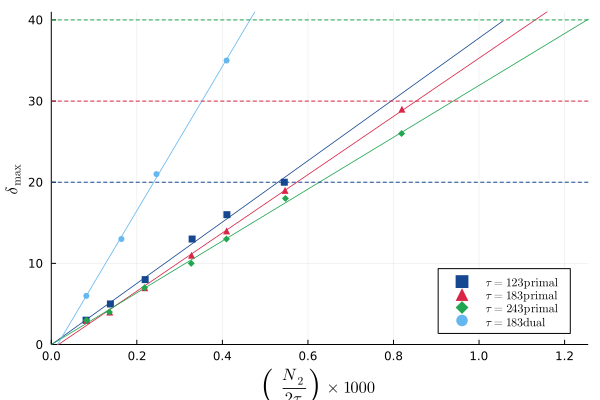

In [30]:
plot()

t123pcol = appelcols[1]
t183pcol = appelcols[2]
t243pcol = appelcols[3]
t183dcol = appelcols[4]

scatter!([x/(2*123) for x in pvolst123], pdelmaxt123, label=L"\tau=123 \textrm{ primal}", 
    ms=3.5, markerstrokecolor=t123pcol, color=t123pcol, markershape=:rect)
plot!(x -> coef(ols123)[2]*2*123*x + coef(ols123)[1], 0, 130/123,
    ms=6, markerstrokecolor=t123pcol, color=t123pcol, lw=0.8, label=false)

scatter!([x/(2*183) for x in pvolst183], pdelmaxt183, label=L"\tau=183 \textrm{ primal}", 
    ms=3.5, markerstrokecolor=t183pcol, color=t183pcol, markershape=:utriangle)

plot!(x -> coef(ols183)[2]*2*183*x + coef(ols183)[1], 0, 312/183,
    ms=6, markerstrokecolor=t183pcol, color=t183pcol, lw=0.8, label=false)
scatter!([x/(2*243) for x in pvolst243], pdelmaxt243, label=L"\tau=243 \textrm{ primal}", 
    ms=3.5, markerstrokecolor=t243pcol, color=t243pcol, markershape=:diamond)

plot!(x -> coef(ols243)[2]*2*243*x + coef(ols243)[1], 0, 3,
    ms=6, markerstrokecolor=t243pcol, color=t243pcol, lw=0.8, label=false)
scatter!([x/(2*183) for x in dvols], ddelmax, label=L"\tau=183 \textrm{ dual}", 
    ms=3.5, markerstrokecolor=t183dcol, color=t183dcol)
plot!(x -> coef(olsd183)[2]*2*183*x + coef(olsd183)[1], 0, 3,
    ms=6, markerstrokecolor=t183dcol, color=t183dcol, lw=0.8, label=false)

plot!(x -> 20, 0, 3, color=t123pcol, linestyle=:dash, label=false)
plot!(x -> 30, 0, 3, color=t183pcol, linestyle=:dash, label=false)
plot!(x -> 40, 0, 3, color=t243pcol, linestyle=:dash, label=false)

plot!(xlims = (0, 610/(2*243)), ylims = (0, 41), legend=:bottomright)
ylabel!(L"\delta_\textrm{max}")
display(xlabel!(L"\left(\frac{N_2}{2\tau}\right) \times 1000"))

savefig("delmax-n2.pdf")
savefig("../article/figures/delmax-n2.pdf")

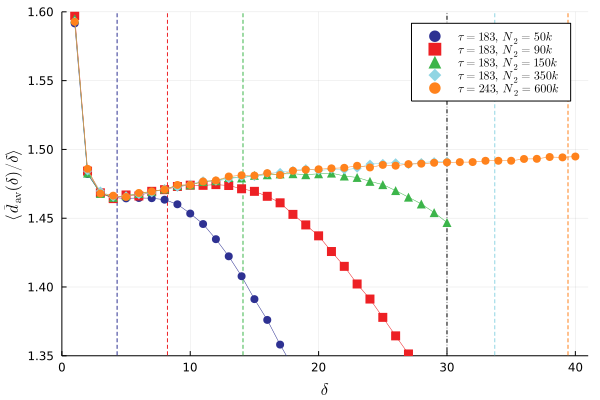

In [29]:
plot()
# cmap = Dict(50 => 3, 90 => 8, 150 => 12, 350 => 23, 500 => 15, 600 => 24)
# cols = Dict([a => colorschemes[:klimt][b] for (a,b) in cmap])
# cmap = Dict(50 => 1, 90 => 2, 150 => 3, 350 => 4, 500 => 5, 600 => 5)
# cmap = Dict(50 => 1, 90 => 7, 150 => 3, 350 => 4, 500 => 5, 600 => 5)
# cols = Dict([a => appelcols[b] for (a,b) in cmap])

cmap = Dict(50 => 1, 90 => 2, 150 => 3, 350 => 5, 500 => 6, 600 => 6)
cols = Dict([a => garliccols[b] for (a,b) in cmap])
shapes = Dict(50 => :circle, 90 => :rect, 150 => :utriangle, 350 => :diamond, 500 => :dtriangle, 600 => :circle)
sid = "ric2dcdt"

for v in [50, 90, 150, 350]
    vline!([coef(ols183)[2]*v + coef(ols183)[1]], label=false, color=cols[v], linestyle=:dash)
end
vline!([coef(ols243)[2]*600 + coef(ols243)[1]], label=false, color=cols[600], linestyle=:dash)
vline!([30], label=false, color=:black, linestyle=:dashdot)

for v in [50, 90, 150, 350]
    scatter!(1:size(vmean[sid][v], 1), vmean[sid][v], 
        label=L"\tau=183,\, N_2=%$v k", ms=4.5, markerstrokecolor=cols[v], color=cols[v],markershape=shapes[v]
    )
    plot!(1:size(vmean[sid][v], 1), vmean[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.5, label=false, color=cols[v])
end
vv = 600
scatter!(1:size(vmean[sid][vv], 1), vmean[sid][vv], 
        label=L"\tau=243,\, N_2=%$vv k", ms=4.5, markerstrokecolor=cols[vv], color=cols[vv],markershape=shapes[vv]
    )
plot!(1:size(vmean[sid][vv], 1), vmean[sid][vv], ms=6, markerstrokecolor=cols[vv], lw=0.5, label=false, color=cols[vv])

# for v in vols[sid]
#     plot!(1:size(vmean[sid][v], 1), vmean[sid][v], yerr=vse[sid][v], ms=6, markerstrokecolor=cols[v], lw=0.3, label=false, color=cols[v])
# end


plot!(xlims = (0, 41), ylims = (1.35, 1.6))
ylabel!(L"\langle\bar{d}_\textrm{av}(\delta)/\delta\rangle")
display(xlabel!(L"\delta"))
savefig("ric2dcdt-delmax.pdf")